# Lets create a patient

# Time to create our own model

In [5]:
from PyTCI.weights import leanbodymass
from patient_solver import solve_for_patient

class Marsden(propofol.Propofol):
    def __init__(self, age, weight, height, sex, params):
        
        lean_body_mass = leanbodymass.hume66(height, weight, sex)
        
        self.v1 = ((params[1] * 50) - params[2]*(age - (params[3] * 100))) * (params[4] * (lean_body_mass - (params[5] * 100)))
        self.v2 = params[6] * lean_body_mass * 2
        self.v3 = params[7] * weight * 5
        
        self.Q1 = (params[8] * self.v1) * (params[9] * age)
        self.Q2 = params[9]
        self.Q3 = params[0]
        
        self.keo = 0
        
        propofol.Propofol.from_clearances(self)
        propofol.Propofol.setup(self)
                                                         
                   
                   
                   
def solve_for_custom(patient, params):
    patient_model = Marsden(patient["age"], patient["weight"], patient["height"], patient["sex"], params )
    return solve_for_patient(patient_model, patient["events"])
                                                               

[0.257, 0.3536, 0.7554, 0.4938, 0.4435, 0.4727, 0.1892, 0.5205, 0.22, 0.0314]
[0.9803, 0.3328, 0.0437, 0.431, 0.4732, 0.0898, 0.2223, 0.5343, 0.8534, 0.0379]


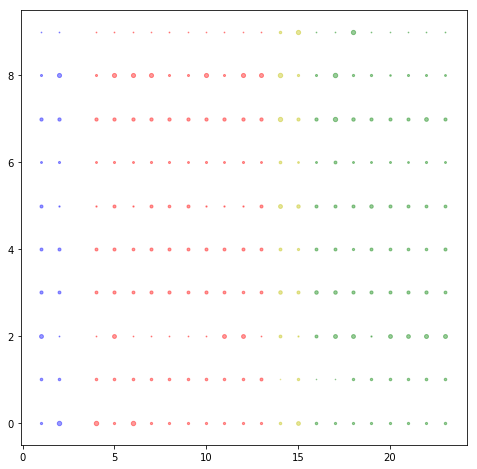

In [6]:
%matplotlib inline

from genetic_solver import mutate_population, create_new_set
plt.figure(figsize=(8,8))

setlength = 10

example_1 = create_new_set(setlength)
example_2 = create_new_set(setlength)

def plt_set(j, k, l):
    for i in range(len(j)):
        scale = j[i] * 20
        plt.scatter(k, i, s=scale, c=l, alpha=0.4)
        
plt_set(example_1, 1, 'b')
plt_set(example_2, 2, 'b')


print(example_1)
print(example_2)

pop = mutate_population(10, example_1, example_2, 4)

num = 3
for j in range(len(pop)):
    num+=1
    colour = 'r'
    if 13 < num < 16:
        colour = 'y'
    elif num > 15:
        colour = 'g'
    plt_set(pop[j], num, colour)
    

plt.show()

In [5]:
from csvreader import read_patient_csv

def test_against_real_data(stuff):
    pmin = stuff[0]
    pmax = stuff[1]
    params = stuff[2]
    patients = read_patient_csv()

    totalrms = 0
    totalmed = 0
    totalbias = 0
    count = 0

    for patient in patients[pmin:pmax]:
        res = solve_for_custom(patient, params)
        a = res["percent"]
        med = res["median"]
        bias = res["bias"]

        totalrms += a
        totalbias += bias
        totalmed += med
        count += 1

    b = totalrms / count
    c = totalmed / count
    d = totalbias / count

    data = (b, c, d)
    return data

In [8]:
from genetic_solver import create_new_population, multi_core_test
%matplotlib inline
import time
import matplotlib.pyplot as plt

from IPython import display
from multiprocessing import Pool
plt.figure(figsize=(8,8))
print("creating population")

pop = create_new_population(10, 10)
pool = Pool(4)


def test_population(pop):

    pop_list = []
    for i in pop:
        stuff = (1, 50, i)
        result = multi_core_test(4, 100, i)
        fitness = result[1]
        pop_list.append([fitness, i, result])
#         try:
#             result = multi_core_test(4, 100, i)
#             fitness = result[1]
#             pop_list.append([fitness, i, result])

#         except:
#             result = (99, 99, 99)
#             fitness = result[1]
#             pop_list.append([fitness, i, result])
    
    pop_list.sort()
    output = (pop_list[0][1], pop_list[0][2], pop_list[1][1], pop_list[1][2])

    return output

print("beginning test")
fit_results = test_population(pop)

fittest_set = fit_results[0]
best_fitness = fit_results[1][1]
second_set = fit_results[2]
second_fitness = fit_results[3][1]

max_tries = 0
while best_fitness > 9.9:
    fit_results = test_population(pop)
    best_fitness = fit_results[1][1]
    
    print ("trying again")    

pltB = []
pltS = []


print("starting")
plt.axis([0, 20, 0, 1.2])
for _ in range(30):
    new_pop = mutate_population(4, fittest_set, second_set, 4)
    
    fit_results = test_population(new_pop)

    fittest_set = fit_results[0]
    best_fitness = fit_results[1][1]
    second_set = fit_results[2]
    second_fitness = fit_results[3][1]
    
    pltB.append(best_fitness)
    pltS.append(second_fitness)
    
    plt.plot(pltB, 'g', pltS, 'y')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.05)

print ("finished!!")

creating population
beginning test


NameError: name 'pool' is not defined

<Figure size 576x576 with 0 Axes>